# Openparse Example Notebook

This notebook demonstrates how to use the `openparse[ml]` library to extract text from PDF files. The examples include basic text extraction as well as advanced text extraction with layout handling and rendering.

## 1: Install `openparse[ml]`

First, we need to install the `openparse[ml]` library. Run the cell below to install it.

In [13]:
!pip install "openparse[ml]"


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


## 2. Basic Extraction

In [1]:
import openparse

basic_doc_path = "./sample-docs/mobile-home-manual.pdf"
parser = openparse.DocumentParser()
parsed_basic_doc = parser.parse(basic_doc_path)

for node in parsed_basic_doc.nodes:
    display(node)

**RULE 9 - 55 AND RETIRED DISCOUNT**<br><br>If the following criteria are met, reduce the otherwise applicable Standard or Deluxe Policy 
Package Premium by 10%. <br><br>1.  One of the Named Insureds must be age 55 or older. <br><br>2. 
Both the Named Insured and Spouse, if any, are not presently gainfully employed full- 
time or actively seeking full-time gainful employment. <br><br>3.  The Insured Residence must be the Principal Residence of the Applicant. 

**RULE 10 - CLASSIFICATION**<br><br>Mobile Homes are classified either Class 1 or Class 2. <br><br>1. <br><br>Class 1 rates and premiums apply to owner-occupied one-family Mobile Home which 
meet the following requirements: <br><br>a.  Principal residence of occupant <br><br>b.  Used exclusively for residential purposes <br><br>2. 
All other mobile homes are Class 2. Premiums are determined by applying the factor 
shown on the Supplementary Rate Page. 

**RULE 11 - PREMIUM DETERMINATION**<br><br>The premium calculations should be done in the following order. <br><br>A. Determine the Package Premium for Class 1 Mobile Home from the State Rate Pages 
according to the Territorial Zone, type of policy, tie down status, deductible, park size, 
premium group, and purchase price. <br><br>B. Multiply the appropriate Package Premium amount by a Rate Adjustment Factor of 1.398. <br><br>C. Apply the deductible factor, if applicable. <br><br>D. Apply the Out-of-Park Surcharge, if applicable. <br><br>E. Apply the original owner discount, if applicable. <br><br>F. Apply the protective device discount, if applicable. <br><br>G. Apply the 55 and retired discount, if applicable. <br><br>H. For Class 2 Mobile Home, apply the Class 2 factor. <br><br>I. Apply The Good Hands People Discount, if applicable. 

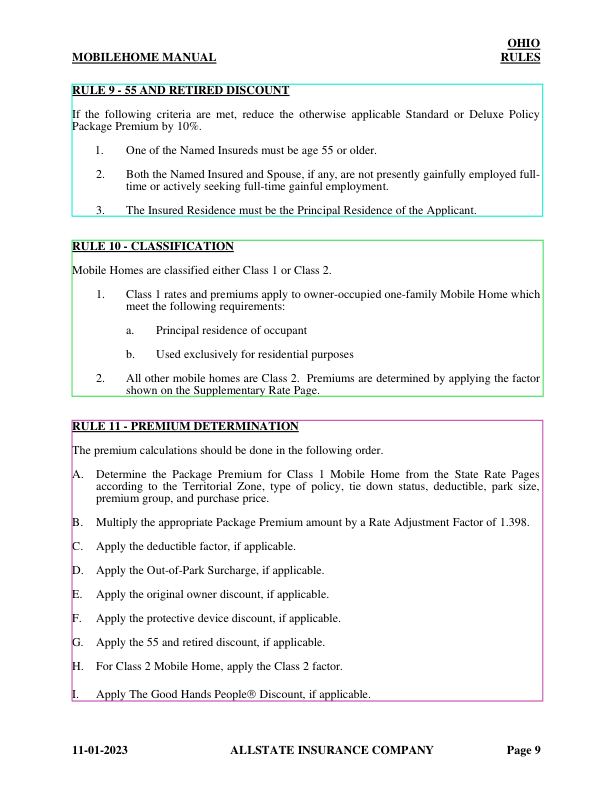

In [2]:
# you can also easily display the nodes on the actual document

pdf = openparse.Pdf(basic_doc_path)
pdf.display_with_bboxes(
    parsed_basic_doc.nodes,
)

## 3. Serialization:

OpenParse returns pydantic models that can easily be serialized

In [3]:
parsed_basic_doc.model_dump()

{'nodes': [{'embedding': None,
   'node_id': '2cd20b7f-355b-46db-9527-a46030ed98a8',
   'variant': {'text'},
   'tokens': 108,
   'bbox': [{'page': 0,
     'page_height': 792.0,
     'page_width': 612.0,
     'x0': 72.05,
     'y0': 575.79,
     'x1': 542.78,
     'y1': 707.83}],
   'text': '**RULE 9 - 55 AND RETIRED DISCOUNT**<br><br>If the following criteria are met, reduce the otherwise applicable Standard or Deluxe Policy \nPackage Premium by 10%. <br><br>1.  One of the Named Insureds must be age 55 or older. <br><br>2. \nBoth the Named Insured and Spouse, if any, are not presently gainfully employed full- \ntime or actively seeking full-time gainful employment. <br><br>3.  The Insured Residence must be the Principal Residence of the Applicant. '},
  {'embedding': None,
   'node_id': '8f138fe5-9a7b-443a-ac76-2a1bfc8acd26',
   'variant': {'text'},
   'tokens': 95,
   'bbox': [{'page': 0,
     'page_height': 792.0,
     'page_width': 612.0,
     'x0': 72.05,
     'y0': 395.72,
     '

## Tables

We aim to be model agnostic - the DocumentParser supports extracting tables using either the "table-transformers" or "pymupdf" libraries - we're model agnostic. The `parsing_algorithm` field in the configuration dictionary decides which one to use.

The `PyMuPDFArgsDict` (and similarly the `TableTransformersArgsDict`) lets you fine-tune how tables are extracted using specific arguments.

In [4]:
doc_with_tables_path = "./sample-docs/companies-list.pdf"

parser = openparse.DocumentParser(
    table_args={"parsing_algorithm": "table-transformers"}
)
parsed_doc2 = parser.parse(doc_with_tables_path)

for node in parsed_doc2.nodes:
    display(node)

/Users/leone/github/document-parsing/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<table border="1">
<thead>
<tr>
<th style="min-width:171px;">GROUP NAME</th>
<th style="min-width:156px;">GROUP</th>
<th style="min-width:51px;">CO NO</th>
<th style="min-width:40px;">STMT</th>
<th style="min-width:45px;">STATUS</th>
<th style="min-width:26px;">ST</th>
<th style="min-width:168px;">COMPANY NAME</th>
</tr>
</thead>
<tbody>
<tr>
<td style="min-width:171px;">CVS GRP</td>
<td style="min-width:156px;">1</td>
<td style="min-width:51px;">15827</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">PA</td>
<td style="min-width:168px;">AETNA HLTH ASSUR PA INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95935</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">CT</td>
<td style="min-width:168px;">AETNA HLTH INC CT CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95088</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">FL</td>
<td style="min-width:168px;">AETNA HLTH INC FL CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95094</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">GA</td>
<td style="min-width:168px;">AETNA HLTH INC GA CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95517</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">ME</td>
<td style="min-width:168px;">AETNA HLTH INC ME CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95287</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">NJ</td>
<td style="min-width:168px;">AETNA HLTH INC NJ CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95234</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">NY</td>
<td style="min-width:168px;">AETNA HLTH INC NY CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95109</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">PA</td>
<td style="min-width:168px;">AETNA HLTH INC PA CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95490</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">TX</td>
<td style="min-width:168px;">AETNA HLTH INC TX CORP</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">72052</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">PA</td>
<td style="min-width:168px;">AETNA HLTH INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">84450</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">NY</td>
<td style="min-width:168px;">AETNA HLTH INS CO OF NY</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95241</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">IA</td>
<td style="min-width:168px;">AETNA HLTH OF IA INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95756</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">MI</td>
<td style="min-width:168px;">AETNA HLTH OF MI INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">15805</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">OH</td>
<td style="min-width:168px;">AETNA HLTH OF OH INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">95407</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">UT</td>
<td style="min-width:168px;">AETNA HLTH OF UTAH INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">60054</td>
<td style="min-width:40px;">L</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">CT</td>
<td style="min-width:168px;">AETNA LIFE INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">17352</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">MN</td>
<td style="min-width:168px;">ALLINA HLTH & AETNA HLTH PLAN INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">16194</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">MN</td>
<td style="min-width:168px;">ALLINA HLTH & AETNA INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">12321</td>
<td style="min-width:40px;">L</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">TN</td>
<td style="min-width:168px;">AMERICAN CONTINENTAL INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">16058</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">AZ</td>
<td style="min-width:168px;">BANNER HLTH & AETNA HLTH INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">16059</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">AZ</td>
<td style="min-width:168px;">BANNER HLTH & AETNA HLTH PLAN INC</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">68500</td>
<td style="min-width:40px;">L</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">TN</td>
<td style="min-width:168px;">CONTINENTAL LIFE INS CO BRENTWOOD</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">81973</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">MO</td>
<td style="min-width:168px;">COVENTRY HLTH & LIFE INS CO</td>
</tr>
<tr>
<td style="min-width:171px;"></td>
<td style="min-width:156px;"></td>
<td style="min-width:51px;">74160</td>
<td style="min-width:40px;">X</td>
<td style="min-width:45px;">1</td>
<td style="min-width:26px;">IL</td>
<td style="min-width:168px;">COVENTRY HLTH CARE OF IL INC</td>
</tr>
</tbody>
</table>

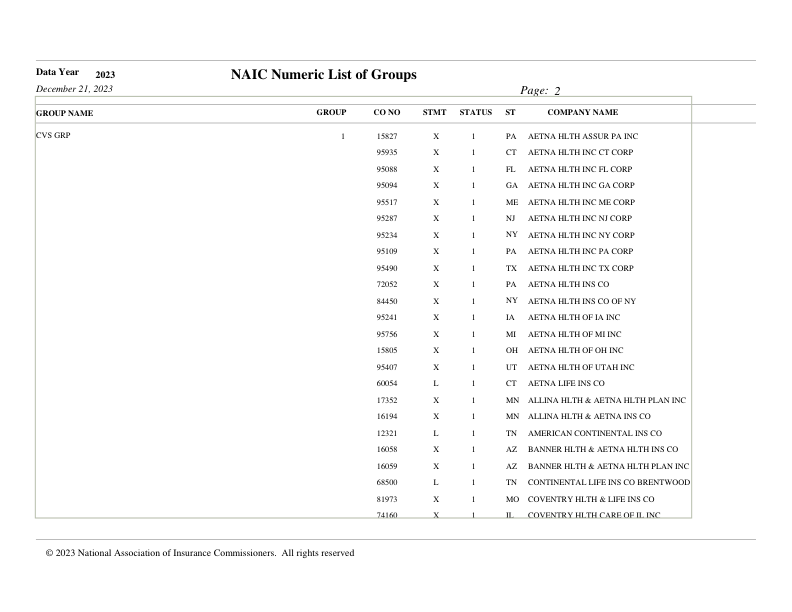

In [5]:
pdf = openparse.Pdf(doc_with_tables_path)
pdf.display_with_bboxes(
    parsed_doc2.nodes,
)

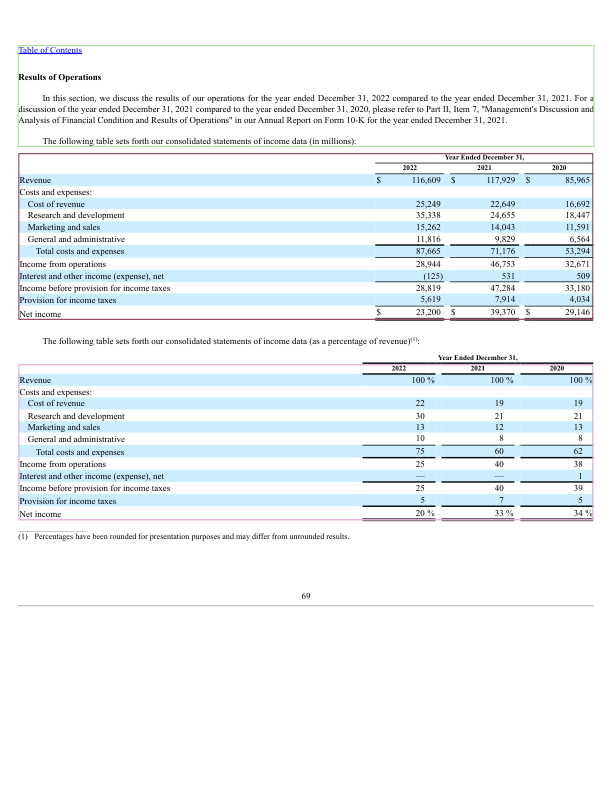

Table of Contents <br><br>**Results of Operations**<br><br>In this section, we discuss the results of our operations for the year ended December 31, 2022 compared to the year ended December 31, 2021. For a 
discussion of the year ended December 31, 2021 compared to the year ended December 31, 2020, please refer to Part II, Item 7, "Management's Discussion and 
Analysis of Financial Condition and Results of Operations" in our Annual Report on Form 10-K for the year ended December 31, 2021. <br><br>The following table sets forth our consolidated statements of income data (in millions): 

**Year Ended December 31,**<br><br><table border="1">
<tr><th></th><th></th><th>2022</th><th></th><th></th><th>2021</th><th></th><th></th><th>2020</th></tr>
<tr><td>Revenue</td><td>$</td><td>116,609</td><td> </td><td>$</td><td>117,929</td><td> </td><td>$</td><td>85,965</td></tr>
<tr><td>Costs and expenses:</td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td></tr>
<tr><td>Cost of revenue</td><td>25,249</td><td> </td><td> </td><td>22,649</td><td> </td><td> </td><td>16,692</td><td> </td></tr>
<tr><td>Research and development</td><td>35,338</td><td> </td><td> </td><td>24,655</td><td> </td><td> </td><td>18,447</td><td> </td></tr>
<tr><td>Marketing and sales</td><td>15,262</td><td> </td><td> </td><td>14,043</td><td> </td><td> </td><td>11,591</td><td> </td></tr>
<tr><td>General and administrative</td><td>11,816</td><td> </td><td> </td><td>9,829</td><td> </td><td> </td><td>6,564</td><td> </td></tr>
<tr><td>Total costs and expenses</td><td>87,665</td><td> </td><td> </td><td>71,176</td><td> </td><td> </td><td>53,294</td><td> </td></tr>
<tr><td>Income from operations</td><td>28,944</td><td> </td><td> </td><td>46,753</td><td> </td><td> </td><td>32,671</td><td> </td></tr>
<tr><td>Interest and other income (expense), net</td><td>(125)</td><td> </td><td> </td><td>531</td><td> </td><td> </td><td>509</td><td> </td></tr>
<tr><td>Income before provision for income taxes</td><td>28,819</td><td> </td><td> </td><td>47,284</td><td> </td><td> </td><td>33,180</td><td> </td></tr>
<tr><td>Provision for income taxes</td><td>5,619</td><td> </td><td> </td><td>7,914</td><td> </td><td> </td><td>4,034</td><td> </td></tr>
<tr><td>Net income</td><td>$</td><td>23,200</td><td> </td><td>$</td><td>39,370</td><td> </td><td>$</td><td>29,146</td></tr>
</table>

<table border="1">
<tr><th></th><th>2022</th><th></th><th></th><th>2021</th><th></th><th>2020</th><th></th></tr>
<tr><td>Revenue</td><td>100</td><td>%</td><td> </td><td>100</td><td>%</td><td>100</td><td>%</td></tr>
<tr><td>Costs and expenses:</td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td></tr>
<tr><td>Cost of revenue</td><td>22</td><td> </td><td> </td><td>19</td><td> </td><td>19</td><td> </td></tr>
<tr><td>Research and development</td><td>30</td><td> </td><td> </td><td>21</td><td> </td><td>21</td><td> </td></tr>
<tr><td>Marketing and sales</td><td>13</td><td> </td><td> </td><td>12</td><td> </td><td>13</td><td> </td></tr>
<tr><td>General and administrative</td><td>10</td><td> </td><td> </td><td>8</td><td> </td><td>8</td><td> </td></tr>
<tr><td>Total costs and expenses</td><td>75</td><td> </td><td> </td><td>60</td><td> </td><td>62</td><td> </td></tr>
<tr><td>Income from operations</td><td>25</td><td> </td><td> </td><td>40</td><td> </td><td>38</td><td> </td></tr>
<tr><td>Interest and other income (expense), net</td><td>—</td><td> </td><td> </td><td>—</td><td> </td><td>1</td><td> </td></tr>
<tr><td>Income before provision for income taxes</td><td>25</td><td> </td><td> </td><td>40</td><td> </td><td>39</td><td> </td></tr>
<tr><td>Provision for income taxes</td><td>5</td><td> </td><td> </td><td>7</td><td> </td><td>5</td><td> </td></tr>
<tr><td>Net income</td><td>20</td><td>%</td><td> </td><td>33</td><td>%</td><td>34</td><td>%</td></tr>
</table>

In [6]:
meta10k_path = "./sample-docs/meta-10k.pdf"

parser = openparse.DocumentParser(table_args={"parsing_algorithm": "pymupdf"})
parsed_10k = parser.parse(meta10k_path)

doc = openparse.Pdf(file=meta10k_path)
doc.display_with_bboxes(parsed_10k.nodes)

for node in parsed_10k.nodes:
    display(node)

## 4. Custom Processing (Advanced)

While we've chosen sensible defaults, you can add custom processing functions to the `DocumentParser` class to further process the extracted data.

This allows use cases like:
- Using embeddings to parse nodes split across pages
- Use GPT-4V to choose which nodes to combine

Combining concurrent tables


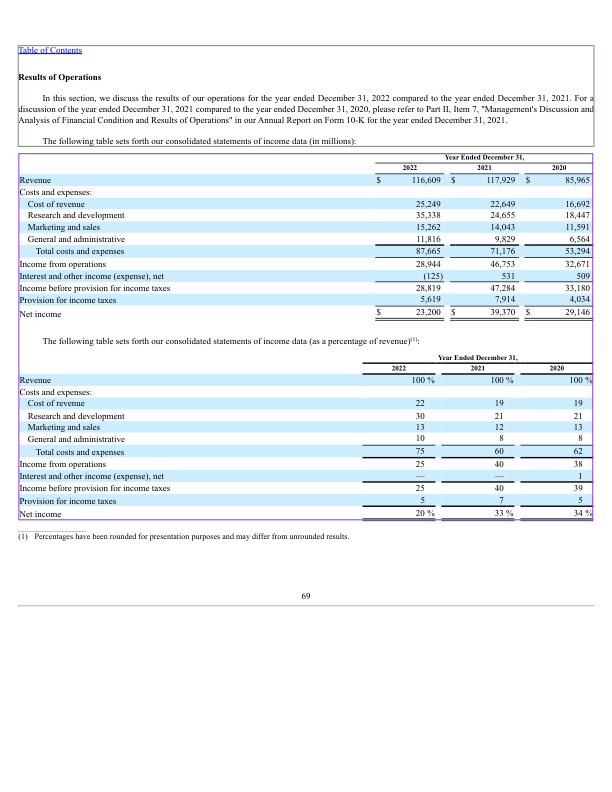

Table of Contents <br><br>**Results of Operations**<br><br>In this section, we discuss the results of our operations for the year ended December 31, 2022 compared to the year ended December 31, 2021. For a 
discussion of the year ended December 31, 2021 compared to the year ended December 31, 2020, please refer to Part II, Item 7, "Management's Discussion and 
Analysis of Financial Condition and Results of Operations" in our Annual Report on Form 10-K for the year ended December 31, 2021. <br><br>The following table sets forth our consolidated statements of income data (in millions): 

**Year Ended December 31,**<br><br><table border="1">
<tr><th></th><th></th><th>2022</th><th></th><th></th><th>2021</th><th></th><th></th><th>2020</th></tr>
<tr><td>Revenue</td><td>$</td><td>116,609</td><td> </td><td>$</td><td>117,929</td><td> </td><td>$</td><td>85,965</td></tr>
<tr><td>Costs and expenses:</td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td></tr>
<tr><td>Cost of revenue</td><td>25,249</td><td> </td><td> </td><td>22,649</td><td> </td><td> </td><td>16,692</td><td> </td></tr>
<tr><td>Research and development</td><td>35,338</td><td> </td><td> </td><td>24,655</td><td> </td><td> </td><td>18,447</td><td> </td></tr>
<tr><td>Marketing and sales</td><td>15,262</td><td> </td><td> </td><td>14,043</td><td> </td><td> </td><td>11,591</td><td> </td></tr>
<tr><td>General and administrative</td><td>11,816</td><td> </td><td> </td><td>9,829</td><td> </td><td> </td><td>6,564</td><td> </td></tr>
<tr><td>Total costs and expenses</td><td>87,665</td><td> </td><td> </td><td>71,176</td><td> </td><td> </td><td>53,294</td><td> </td></tr>
<tr><td>Income from operations</td><td>28,944</td><td> </td><td> </td><td>46,753</td><td> </td><td> </td><td>32,671</td><td> </td></tr>
<tr><td>Interest and other income (expense), net</td><td>(125)</td><td> </td><td> </td><td>531</td><td> </td><td> </td><td>509</td><td> </td></tr>
<tr><td>Income before provision for income taxes</td><td>28,819</td><td> </td><td> </td><td>47,284</td><td> </td><td> </td><td>33,180</td><td> </td></tr>
<tr><td>Provision for income taxes</td><td>5,619</td><td> </td><td> </td><td>7,914</td><td> </td><td> </td><td>4,034</td><td> </td></tr>
<tr><td>Net income</td><td>$</td><td>23,200</td><td> </td><td>$</td><td>39,370</td><td> </td><td>$</td><td>29,146</td></tr>
</table><br><br><table border="1">
<tr><th></th><th>2022</th><th></th><th></th><th>2021</th><th></th><th>2020</th><th></th></tr>
<tr><td>Revenue</td><td>100</td><td>%</td><td> </td><td>100</td><td>%</td><td>100</td><td>%</td></tr>
<tr><td>Costs and expenses:</td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td><td> </td></tr>
<tr><td>Cost of revenue</td><td>22</td><td> </td><td> </td><td>19</td><td> </td><td>19</td><td> </td></tr>
<tr><td>Research and development</td><td>30</td><td> </td><td> </td><td>21</td><td> </td><td>21</td><td> </td></tr>
<tr><td>Marketing and sales</td><td>13</td><td> </td><td> </td><td>12</td><td> </td><td>13</td><td> </td></tr>
<tr><td>General and administrative</td><td>10</td><td> </td><td> </td><td>8</td><td> </td><td>8</td><td> </td></tr>
<tr><td>Total costs and expenses</td><td>75</td><td> </td><td> </td><td>60</td><td> </td><td>62</td><td> </td></tr>
<tr><td>Income from operations</td><td>25</td><td> </td><td> </td><td>40</td><td> </td><td>38</td><td> </td></tr>
<tr><td>Interest and other income (expense), net</td><td>—</td><td> </td><td> </td><td>—</td><td> </td><td>1</td><td> </td></tr>
<tr><td>Income before provision for income taxes</td><td>25</td><td> </td><td> </td><td>40</td><td> </td><td>39</td><td> </td></tr>
<tr><td>Provision for income taxes</td><td>5</td><td> </td><td> </td><td>7</td><td> </td><td>5</td><td> </td></tr>
<tr><td>Net income</td><td>20</td><td>%</td><td> </td><td>33</td><td>%</td><td>34</td><td>%</td></tr>
</table>

In [7]:
from openparse import processing, Node
from typing import List


class CustomCombineTables(processing.ProcessingStep):
    """
    Let's combine tables that are next to each other
    """

    def process(self, nodes: List[Node]) -> List[Node]:
        new_nodes = []
        print("Combining concurrent tables")
        for i in range(len(nodes) - 1):
            if "table" in nodes[i].variant and "table" in nodes[i + 1].variant:
                new_node = nodes[i] + nodes[i + 1]
                new_nodes.append(new_node)
            else:
                new_nodes.append(nodes[i])

        return new_nodes


# copy the default pipeline (or create a new one)
custom_pipeline = processing.BasicIngestionPipeline()
custom_pipeline.append_transform(CustomCombineTables())

parser = openparse.DocumentParser(
    table_args={"parsing_algorithm": "pymupdf"}, processing_pipeline=custom_pipeline
)
custom_10k = parser.parse(meta10k_path)

doc = openparse.Pdf(file=meta10k_path)
doc.display_with_bboxes(custom_10k.nodes)

for node in custom_10k.nodes:
    display(node)

## 5. Journal Parsing

In [8]:
import openparse

journal_doc_path = "./sample-docs/USENIX-Example-Paper.pdf"
parser = openparse.DocumentParser()
parsed_journal_doc = parser.parse(journal_doc_path)

for node in parsed_journal_doc.nodes:
    display(node)

**Abstract**
This is an example for a USENIX paper, in the form 
of an HTML/CSS template. Being heavily self-ref- 
erential, this template illustrates the features in- 
cluded in this template. It is expected that the 
prospective authors using HTML/CSS would create 
a new document based on this template, remove 
the content, and start writing their paper. <br><br>Note that in this template, you may have a mul- 
ti-paragraph abstract. However, that it is not nec- 
essarily a good practice. Try to keep your abstract 
in one paragraph, and remember that the optimal 
length for an abstract is 200-300 words. 

**1 Introduction**
For the purposes of USENIX conference publica- 
tions, the authors, not the USENIX staff, are solely 
responsible for the content and formatting of their 
paper. The purpose of this template is to help 
those authors that want to use HTML/CSS to write 
their papers. This template has been prepared by 
Håkon Wium Lie, and is based on a guide to using 
FrameMaker for USENIX papers, written by Pekka 
Nikander with the help of Jane-Ellen Long. <br><br>**Figure 1:**This figure is showed for illustrational purpos- 
es only; floppy disks are not required to use this tem- 
plate. <br><br>**2.2 Style manuals**
Besides typography, style is the second element 
of preparing easy-to-read publications. There are 
tens of good style manuals available. To mention 
just a couple, The Elements of Style by Strunk and 
White [1] is a classic, and has remained a bestseller 
since its introduction in 1930’s. From the more 
contemporary ones, Writing for Computer Science 
by Justin Zobel [2] seems appropriate. <br><br>The rest of this paper is organized as follows. 
Section 2 gives a brief overview of related work, 
such as other templates and style manuals. Section 
3 discusses the details of this template, and Sec- 
tion 4 contains our conclusions. 

**2 Related Work**
Preparing good-looking publications is not easy. 
It requires understanding of style and typography. 
The purpose of the templates provided by the 
USENIX organization is to lift the burden of caring 
about typography from the authors. However, the 
authors still remain, and will always remain, re- 
sponsible for the style. <br><br>**3 Implementation**
In this section we cover the features included in 
this template. Our goal has been that the authors 
do not need to make modifications to the template; 
instead, they should be able to concentrate on the 
content and style. With this in mind, this template 
includes a number of features. On the other hand, 
we have also tried to keep this document simple 
and easy to maintain. <br><br>**2.1 Word and LaTeX templates**
The USENIX website includes a template for Mi- 
crosoft Word, as well as LaTeX templates. Many of 
the settings in the CSS style sheet of this template 
have been copied from the LaTeX templates. <br><br>This template is written in HTML, with CSS to 
provide styling, and a small JavaScript to help for- 
mat references. 

Wake 
Up 
Esc  F1  F2  F3  F4  F9  F10  F11  F12  Power  Sleep 
Num Lock  Caps Lock  Scroll Lock <br><br>_
§  !  "  #  ¤  %  &  /  (  )  =  ?  ` 
Print 
Scrn 
SysRq 
Num 
Lock 
/ 
* Scroll 
Lock  Pause 
Break 
|  ½  1  2  @  3  £  4  $  5  6  7  {  8  [  9  ]  0  }  +  ' 
7  8  9 
Q  W  E  R  T  Y  U  I  O  P  Å 
^ 
" ~ 
Page 
Up 
Insert  Home 
€  Home  PgUp 
+ 
4  5  6 
A  S  D  F  G  H  J  K  L  Æ  Ø  *
Page 
Down 
Delete  End  Caps Lock 
' 
_
1  2  3 
> 
< \ 
Z  X  C  V  B  N  M 
; 
,  : 
. 
- 
End  PgDn 
Enter 
0  , 
Ctrl  Alt  Alt Gr  Ctrl 
Ins  Del 

**Figure 2:**This figure floats to the top of the page, spanning both columns. <br><br>references to the end of the paper, leaving behind 
a numeric marker. <br><br>**3.1 HTML5**
This template uses HTML5 elements to aid in rep- 
resenting the document structure. The section 
element is used to split the text into sections, and 
the header element holds the headlines. The 
figure element is used to include figures and 
their corrensponding captions live inside the fig- 
caption element. The cite element holds all ref- 
erences. <br><br>**3.4 PDF**
(This section has been added by Håkon Wium Lie) 
In order to convert the document to PDF, a for- 
matter is needed. Common browsers support 
HTML and CSS, but they do not support all the CSS 
functionality for page-based formatting. For ex- 
ample, browsers do not support footnotes or page 
floats. This paper has been formatted with 
Prince,[a] a purpose-built program for converting 
HTML and XML documents into PDF by way of 
CSS. Prince is a commercial product, but can be 
downloaded and used for free for non-commercial 
purposes. <br><br>A small microformat, based on a convention of 
class names, is used to encode the name and affili- 
ation of the authors. 

**3.2 CSS**
A CSS style sheet describes how to format the 
HTML document into a PDF file. CSS is a declar- 
ative language which attaches property values to 
HTML elements and documents. Many aspects of 
CSS is used to achieve the presentation of USENIX 
papers, including: <br><br>In order for Prince to process the script includ- 
ed in this template, a command line option must 
be specified: <br><br>$ prince --javascript example.html <br><br>• multi-column layout 
• footnotes 
• page and column floats 
• multi-level counters <br><br>**4 Tables**
The table below lists recipients of the USENIX Life- 
time Achievement Award in the 1900s. Notice how 
notes inside the table are moved to the end of the 
table. <br><br>Some commonly used features are absent from 
the above list: page numbers and running headers 
should not be specifed by USENIX authors, these 
are added by those who compile the Proceedings. 
Year  Recipient <br><br>1999  X Window System*<br><br>1998  Tim Berners-Lee <br><br>**3.3 JavaScript**
This template uses JavaScript to process refer- 
ences. References are added at the point where 
they appear, and a script is later used to move the <br><br>1997  Brian W. Kernighan <br><br>[a] www.princexml.com 

work. 
1996  The Software Tools Project <br><br>1995  The Creation of USENET**<br><br>**Availability**
Please include a section at the end of your paper 
providing availability information. If the system 
you describe is available to others, and if more in- 
formation (reports, etc.) may be obtained, indicate 
terms and contact information. <br><br>1994  Networking Technologies <br><br>1993  Berkeley UNIX <br><br>*Given to the Community at Large 
**Given to Jim Ellis and Tom Truscott <br><br>**5 Conclusions**
Each good paper concludes the most significant 
findings in the end. <br><br>**References**
[1] STRUNK, W. JR., AND WHITE, E.B. The Elements 
of Style, 4th Ed, Allyn and Bacon, August, 1999, 
ISBN 020530902X <br><br>**Acknowledgments**
A polite author always includes acknowledgments. 
Thank everyone, especially those who funded the <br><br>[2] ZOBEL, 
J. Writing for Computer Science, 
ISBN 
Springer-Verlag, 
9813083220 
December  1997, 

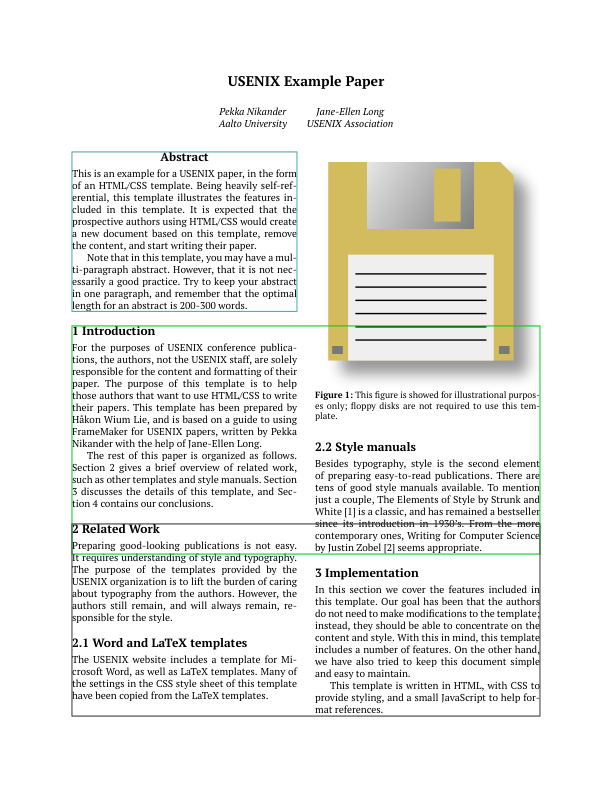

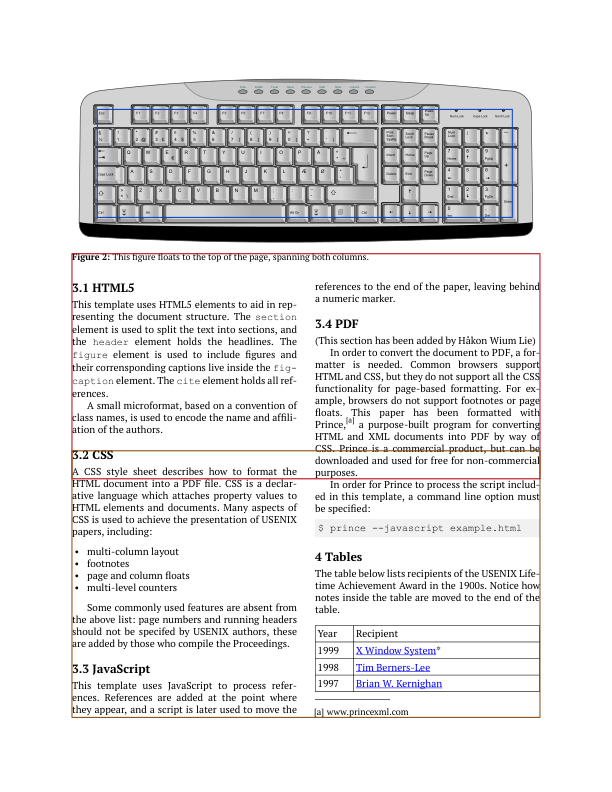

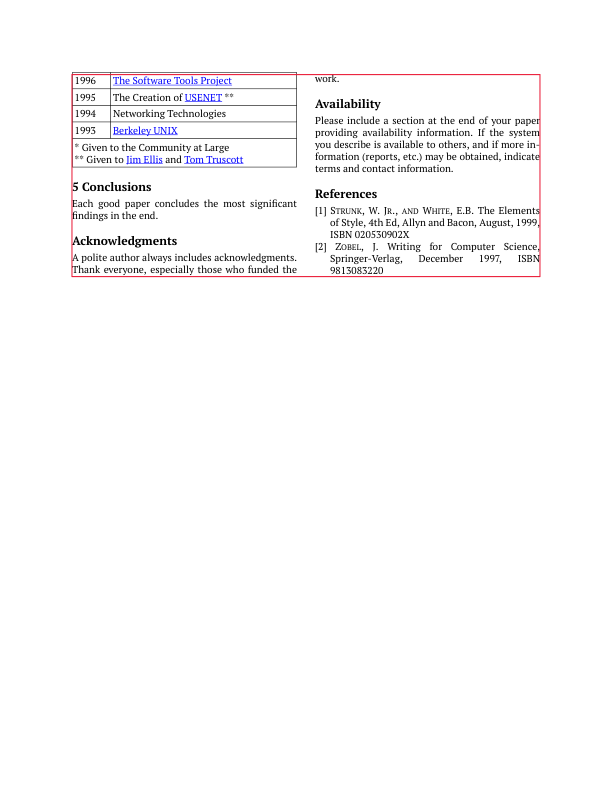

In [9]:
# you can also easily display the nodes on the actual document

pdf = openparse.Pdf(journal_doc_path)
pdf.display_with_bboxes(
    parsed_journal_doc.nodes,
)

### 5.1 Another Journal Parsing Example

In [10]:
import openparse

journal2_doc_path = "./sample-docs/drylab-example.pdf"
parser = openparse.DocumentParser()
parsed_journal2_doc = parser.parse(journal2_doc_path)

for node in parsed_journal2_doc.nodes:
    display(node)

Welcome to our first newsletter of 2017! It's 
been a while since the last one, and a lot has 
happened. We promise to keep them coming 
every two months hereafter, and permit 
ourselves to make this one rather long. The 
big news is the beginnings of our launch in 
the American market, but there are also 
interesting updates on sales, development, 
mentors and (of course) the investment 
round that closed in January. <br><br>the 2.05 MNOK loan from Innovation 
Norway. Including the development 
agreement with Filmlance International, the 
total new capital is 5 MNOK, partly tied to 
the successful completion of milestones. All 
formalities associated with this process are 
now finalized. <br><br>**New owners:**We would especially like to 
warmly welcome our new owners to the 
Drylab family: Unni Jacobsen, Torstein Jahr, 
Suzanne Bolstad, Eivind Bergene, Turid Brun, 
Vigdis Trondsen, Lea Blindheim, Kristine  **New capital:**The investment round was 
successful. We raised 2.13 MNOK to match 

Academy of Motion Picture Arts and Sciences · Alesha & Jamie Metzger · Amazon 
AWS · Apple · Caitlin Burns, PGA · Carlos Melcer · Chimney L.A. · Dado Valentic · 
Dave Stump · DIT WIT · ERA NYC · Facebook · Fancy Film · FilmLight · Geo Labelle · 
Google · IBM · Innovation Norway (NYC) · Innovation Norway (SF) · International 
Cinematographers Guild · NBC · Local 871 · Netflix · Pomfort · Radiant Images · 
Screening Room · Signiant · Moods of Norway · Tapad · Team Downey <br><br>**34**<br><br>meetings 
meetings 
NY · SF 
NY · SF 
LA · LVV 
LA · L 

Holmsen, Torstein Hansen, and Jostein 
Aanensen. We look forward to working with 
you! <br><br>accomplished producer based in New York, 
an active member of the Producers Guild of 
America, and the collaboration has already 
yielded good results, including valuable 
contacts for our visit in Los Angeles. Oscar- 
winning VFX supervisor Dave Stump joined 
us earlier. <br><br>**Sales:**Return customer rate is now 80%, 
proving value and willingness to pay. Film 
Factory Montreal is our first customer in 
Canada. Lumiere Numeriques have started 
using us in France. We also have new 
customers in Norway, and high-profile users 
such as Gareth Unwin, producer of Oscar- 
winning The King's Speech. Revenue for the 
first four months is 200 kNOK, compared to 
339 kNOK for all of 2016. We are working 
on a partnership to safeguard sales in 
Norway while beginning to focus more on 
the US. <br><br>**New York, St. Louis, San Francisco and**
**Los Angeles:**Pontus and Audun did a tour 
of the US in February and March, meeting 
users, partners and potential customers. The 
trip was very successful, with several high 
points, including meetings with Netflix, the 
Academy of Motion Picture Arts and 
Sciences, the International 
Cinematographers Guild, Local 871 (the 
script supervisors' union), one of the world's 
leading DITs, and Apple. See the separate 
attachment for a more detailed summary. 

**NAB:**Andreas and Audun travelled to the 
National Association of Broadcasters 
convention (NAB) in Las Vegas for three 
hectic days in April. NAB gathers 100,000 
participants from film and TV. It's a very 
efficient way of meeting people in the 
business, and getting an updated picture of 
the business landscape. The most exciting 
meeting was with PIX System, one of our 
most important competitors. It was 
interesting to note that they regarded the 
indie market as bigger than their own. 
Andreas was able to secure us an <br><br>**New team members:**We've extended our 
organization with two permanent developers 
based in Łódź, the film capital of Poland. Two 
highly skilled interns from the University of 
Oslo's Entrepreneurship Program, will be 
working on market research until mid-June 
(starting in March), preparing for the US 
launch. Also, two computer science students 
are working as part-time interns during 
spring, on machine learning and analysis 
research, as well as innovative architectures 
based on the Swift language. We hope our 
interns will consider sticking around! <br><br>invitation to the DIT-WIT party, with some of 
the world's leading DITs in attendance. It was 
a great place for informal feedback on Drylab 
Viewer. The pattern was the same as for 
other users: Initial polite interest turns to 
real enthusiasm the moment someone is able 
to personally try Drylab Viewer! We also 
met with Pomfort and Apple about our on- 
going collaborations; ARRI and Teradek/ 

Paralinx about camera integration; Amazon, 
Google and IBM about cloud computing. <br><br>The launch of Drylab 3.0 will take place at <br><br>the International Broadcasters Convention 
in Amsterdam in September, and we are 
working hard to get solid feedback from pilot 
users before then. <br><br>**WWDC and Silicon Valley:**We were very 
pleasantly surprised to be invited by Apple to 
their World Wide Developers Conference in 
San Jose in June, despite not having applied. 
It's a valuable chance to learn and make new 
connections. We’re also setting aside time to 
meet other potential partners.  **Annual General Meeting:**Drylab's AGM 
will be held on June 16th at 15:00. An 
invitation will be distributed to all owners 
well in advance. We hope to see you there! <br><br>**Cine Gear:**We have decided not to attend 
the Cine Gear expo in L.A. this year, since 
feedback from many users about the show 
were mixed, and our planned beta version of 
3.0 is slightly delayed. <br><br>**As you can see it has been a hectic**
**spring that has given us a lot of**
**confirmation about our product. We**
**are now working eagerly and hard**
**towards the US launch with Drylab**
**3.0, while keeping momentum in**
**Europe with our existing system.**<br><br>**Development and launch:**Development 
is around one month behind our original 
schedule. We expect the delay to decrease, 
with new developers on board. 

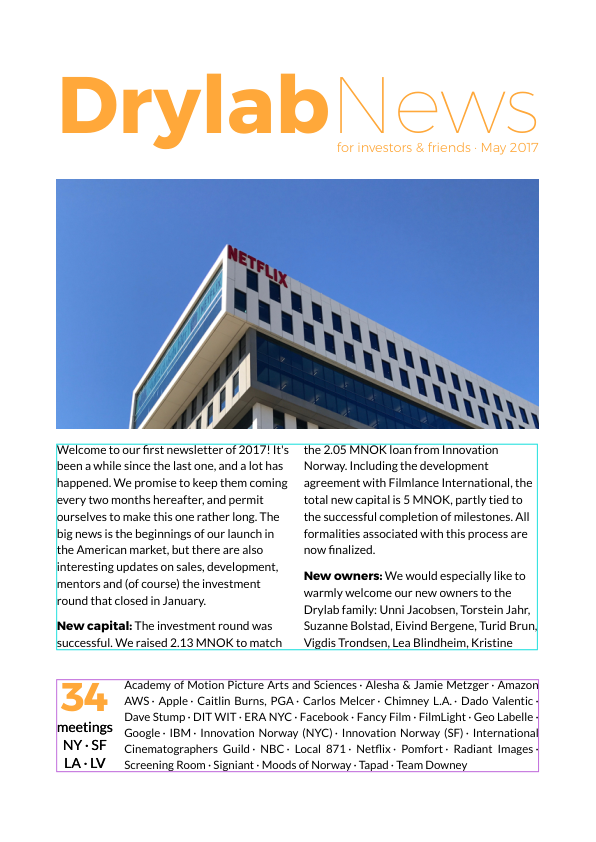

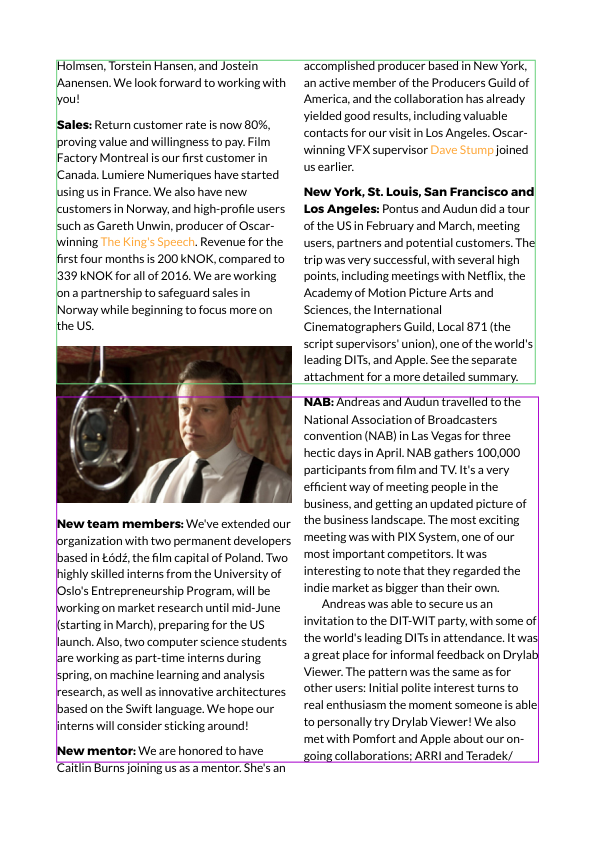

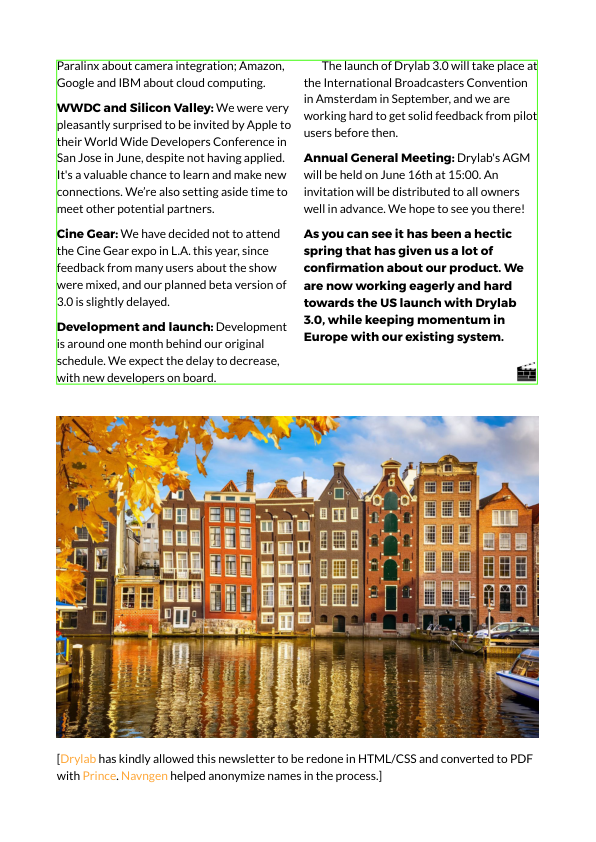

In [11]:
# you can also easily display the nodes on the actual document

pdf = openparse.Pdf(journal2_doc_path)
pdf.display_with_bboxes(
    parsed_journal2_doc.nodes,
)